In [1]:
# %matplotlib qt5
%matplotlib inline

In [2]:
import mne
from mne.externals.pymatreader import read_mat

import matplotlib
import matplotlib.pyplot as plt

import numpy as np

# Lectura y preprocesamiento

In [3]:
mat_data = read_mat('./SEED-VIG/Raw_Data/21_20151016_noon.mat')

samples = mat_data['EEG']['data'].T*1e-6

sfreq = mat_data['EEG']['sample_rate']
ch_names = ['FT7', 'FT8', 'T7', 'T8', 'TP7', 'TP8', 'CP1', 'CP2', 'P1', 'Pz', 'P2', 'PO3', 'POz', 'PO4', 'O1', 'Oz', 'O2']
ch_types = ["eeg"]*len(ch_names)

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)
info.set_montage('standard_1020')

raw = mne.io.RawArray(samples, info)
raw.load_data()

Creating RawArray with float64 data, n_channels=17, n_times=1416000
    Range : 0 ... 1415999 =      0.000 ...  7079.995 secs
Ready.


<RawArray | 17 x 1416000 (7080.0 s), ~183.7 MB, data loaded>

In [4]:
raw.info

<Info | 8 non-empty values
 bads: []
 ch_names: FT7, FT8, T7, T8, TP7, TP8, CP1, CP2, P1, Pz, P2, PO3, POz, PO4, ...
 chs: 17 EEG
 custom_ref_applied: False
 dig: 20 items (3 Cardinal, 17 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 17
 projs: []
 sfreq: 200.0 Hz
>

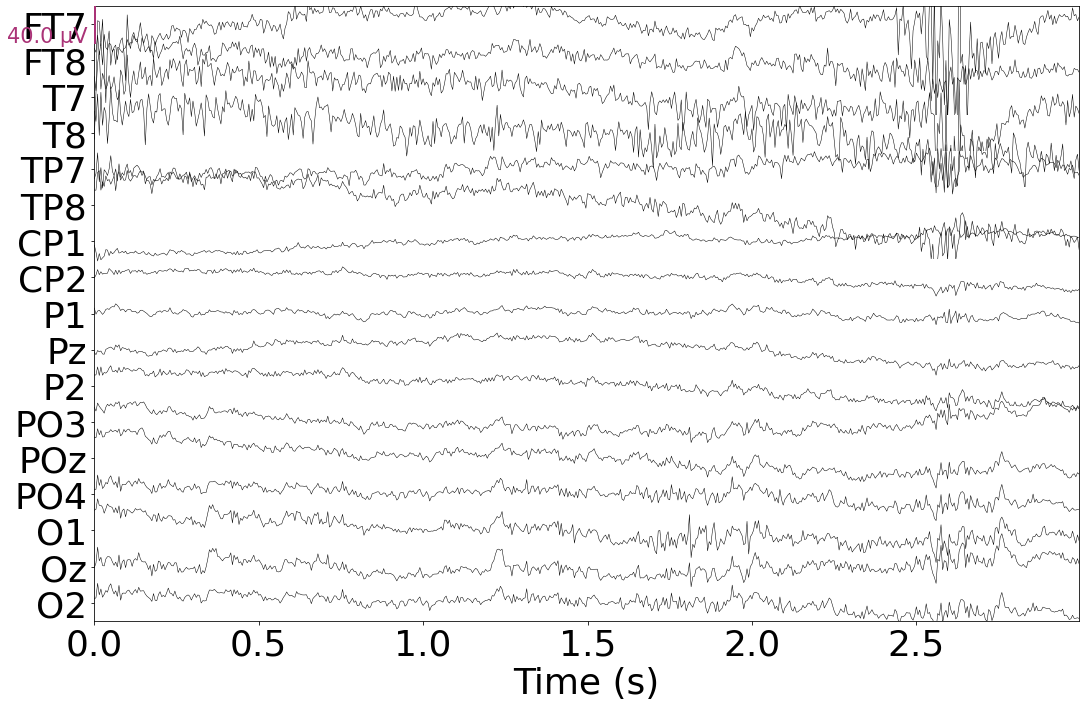

In [7]:
plt.rcParams.update({'font.size': 36})
_ = raw.plot(start=0, duration=3, show_scrollbars=False, n_channels=20)

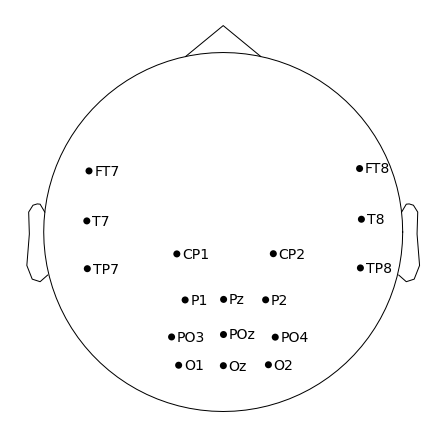

In [8]:
plt.rcParams.update({'font.size': 14})
_ = raw.plot_sensors(show_names=True, sphere=0.085, title='')

In [9]:
duracion = raw.get_data().shape[1]/raw.info['sfreq']
print(f'Duracion en segundos: {duracion}')

Duracion en segundos: 7080.0


In [10]:
perclos_data = read_mat('./SEED-VIG/perclos_labels/21_20151016_noon.mat')

In [11]:
n_perclos = perclos_data["perclos"].shape[0]
print(f'Cantidad de registros PERCLOS: {n_perclos}')

Cantidad de registros PERCLOS: 885


In [12]:
int_perclos = duracion/n_perclos
print (f'Cada {int_perclos} segundos se da un valor de PERCLOS')

Cada 8.0 segundos se da un valor de PERCLOS


In [13]:
raw_filtered = raw.copy().filter(l_freq=1, h_freq=30)
raw_filtered.resample(60)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 661 samples (3.305 sec)



<RawArray | 17 x 424800 (7080.0 s), ~55.1 MB, data loaded>

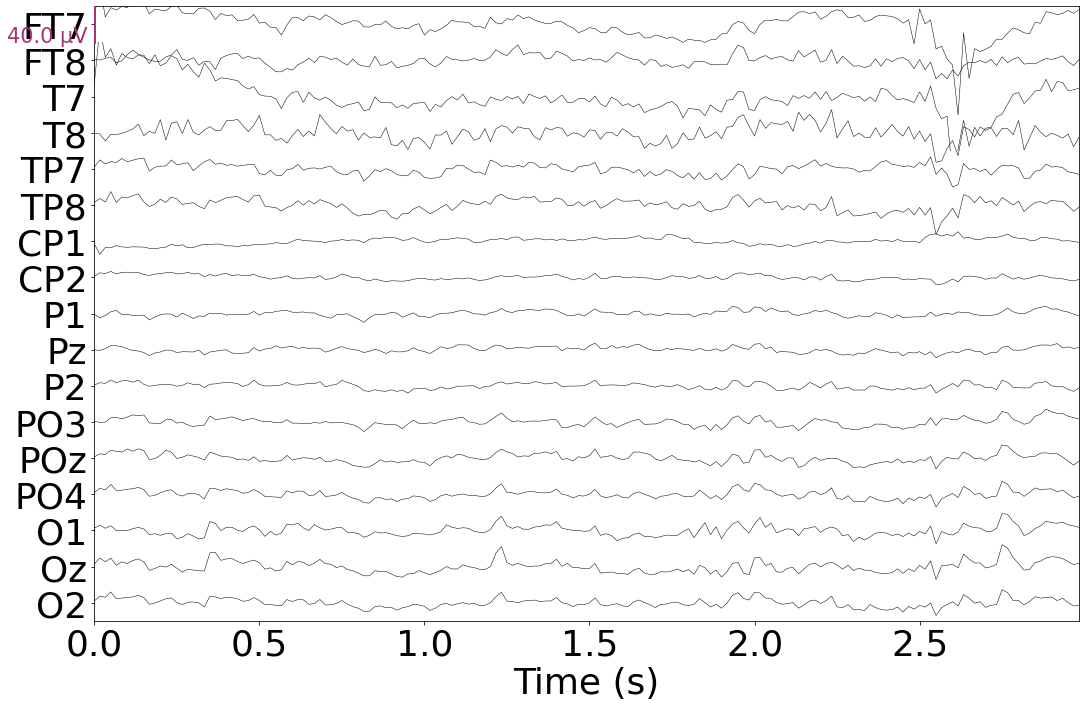

In [14]:
plt.rcParams.update({'font.size': 36})
_ = raw_filtered.plot(start=0, duration=3, show_scrollbars=False)

Effective window size : 10.240 (s)
Effective window size : 34.133 (s)


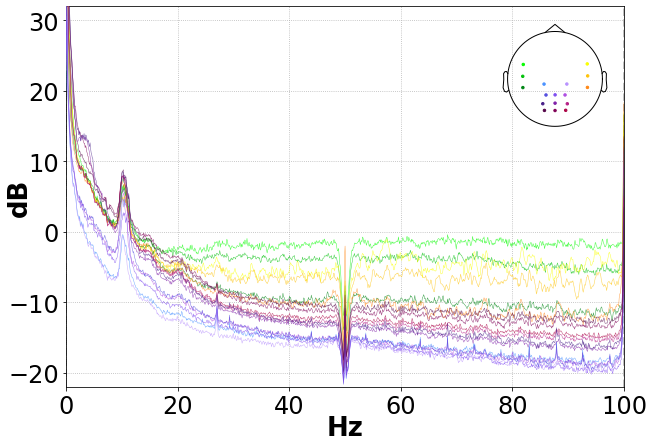

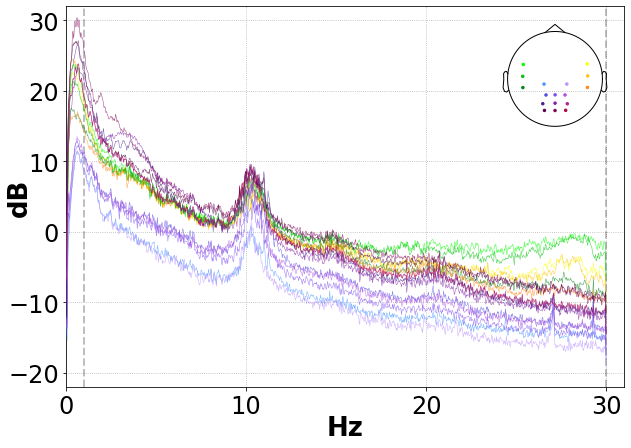

In [14]:
sfreq = raw.info['sfreq']

# start = 0
# end = 2

# data_ini, times_ini = raw[:, int(sfreq * start):int(sfreq * end)]

# fig = plt.subplots(figsize=(10, 8))
# plt.xlabel('Segundos')
# plt.ylabel('$\mu V$')
# plt.xlim(start, end)
# plt.ylim(-1e-4, 1e-4)
# plt.plot(times_ini, data_ini.T);

plt.rcParams.update({'font.size': 24})
fig, ax = plt.subplots(figsize = (10, 7))
_ = raw.plot_psd(ax=ax, show=False)
ax.set(title=None)
ax.set_xlim(0, 100)
ax.set_ylim(-22, 32)
ax.set_yticks([-20,-10,0,10,20,30])
ax.set_xlabel('Hz', labelpad=5)
size_label = 26; ax.set_xlabel('Hz', fontweight ='bold', labelpad = -3,fontsize = size_label); ax.set_ylabel('dB', fontweight ='bold', labelpad = -25,fontsize = size_label);
fig.savefig("E:/UNIVERSIDAD/TFG/TRABAJO/Images-Test/psd-raw.pdf", bbox_inches='tight')
# data_ini, times_ini = raw_filtered[:, int(sfreq * start):int(sfreq * end)]

# plt.figure(figsize=(10, 8))
# plt.xlabel('Segundos')
# plt.ylabel('$\mu V$')
# plt.xlim(start, end)
# plt.ylim(-1e-4, 1e-4)
# plt.plot(times_ini, data_ini.T)

fig, ax = plt.subplots(figsize = (10, 7))
_ = raw_filtered.plot_psd(ax=ax, show=False)
ax.set(title=None)
ax.set_xlim(0, 31)
ax.set_ylim(-22, 32)
ax.set_xticks([0,10,20,30])
ax.set_yticks([-20,-10,0,10,20,30])
ax.set_xlabel('Hz', labelpad=5)
size_label = 26; ax.set_xlabel('Hz', fontweight ='bold', labelpad = -3,fontsize = size_label); ax.set_ylabel('dB', fontweight ='bold', labelpad = -25,fontsize = size_label);
fig.savefig("E:/UNIVERSIDAD/TFG/TRABAJO/Images-Test/psd-filter.pdf", bbox_inches='tight')

In [15]:
#Parametros del ICA
n_components = 0.999  # Should normally be higher, like 0.999!!
method = 'picard'
max_iter = 500  # Should normally be higher, like 500 or even 1000!!
fit_params = dict(fastica_it=5)
random_state = 42

# ica = mne.preprocessing.ICA(n_components=n_components,
#                             method=method,
#                             max_iter=max_iter,
#                             fit_params=fit_params,
#                             random_state=random_state)

ica = mne.preprocessing.ICA(random_state=42)
ica.fit(raw_filtered)

raw_filtered_ica = raw_filtered.copy()
raw_filtered_ica.load_data()

Fitting ICA to data using 17 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 17 components
Fitting ICA took 12.8s.


<RawArray | 17 x 424800 (7080.0 s), ~55.1 MB, data loaded>

Creating RawArray with float64 data, n_channels=17, n_times=424800
    Range : 0 ... 424799 =      0.000 ...  7079.983 secs
Ready.


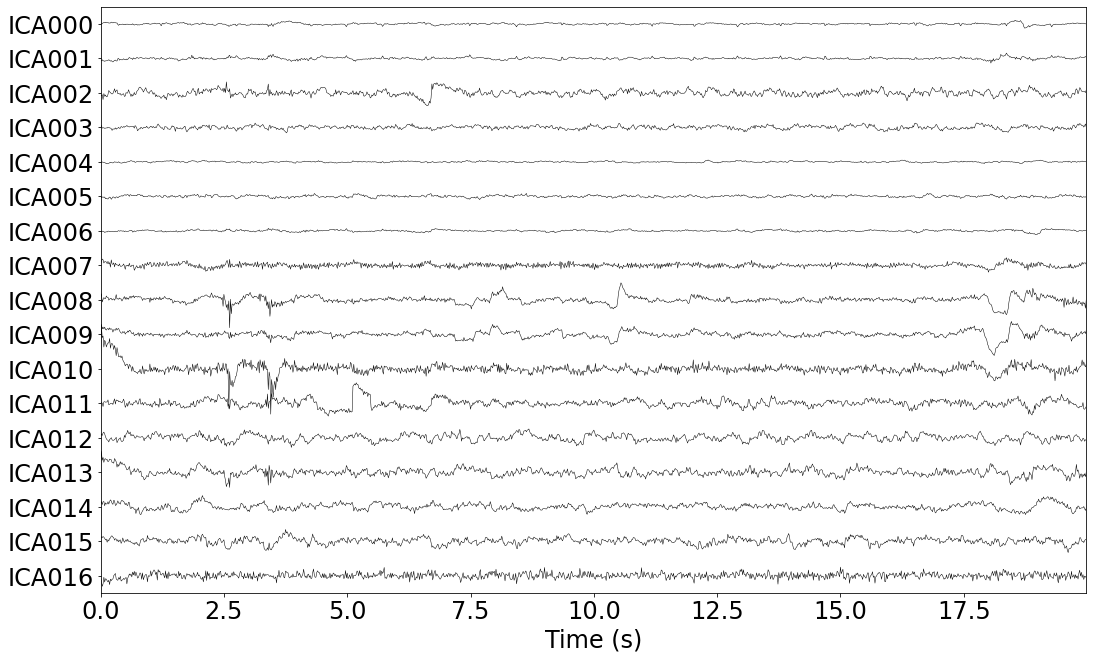

In [16]:
_ = ica.plot_sources(raw_filtered_ica, show_scrollbars=False)

# ica.apply(raw_filtered)

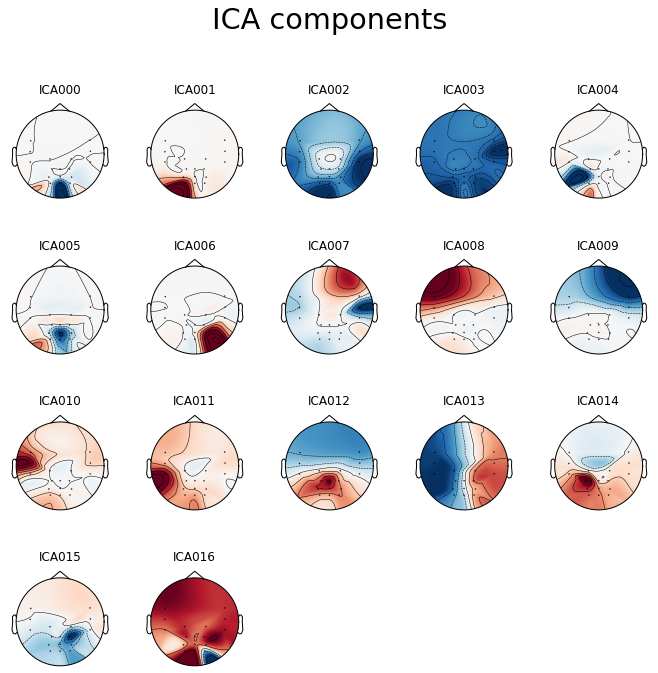

[<MNEFigure size 702x696.24 with 17 Axes>]

In [17]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (17 components)
    Zeroing out 0 ICA components
    Projecting back using 17 PCA components


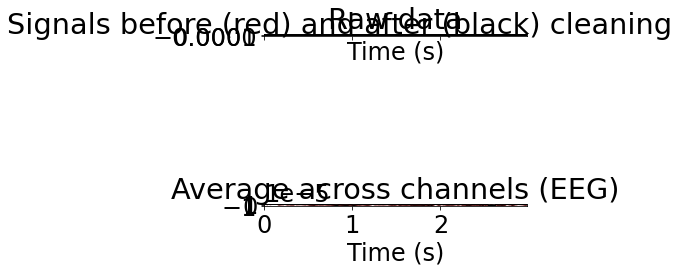

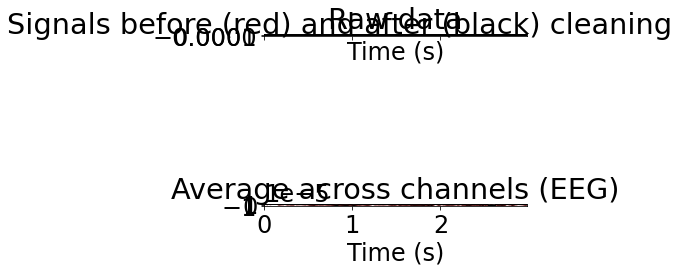

In [18]:
ica.plot_overlay(raw_filtered_ica, picks='eeg')

    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
3540 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


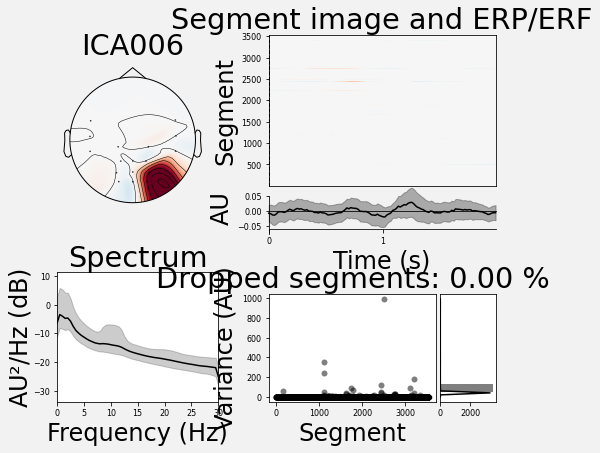

[<Figure size 504x432 with 6 Axes>]

In [19]:
ica.plot_properties(raw_filtered_ica, picks=[6])

In [20]:
ica.apply(raw_filtered_ica)

Applying ICA to Raw instance
    Transforming to ICA space (17 components)
    Zeroing out 0 ICA components
    Projecting back using 17 PCA components


<RawArray | 17 x 424800 (7080.0 s), ~55.1 MB, data loaded>

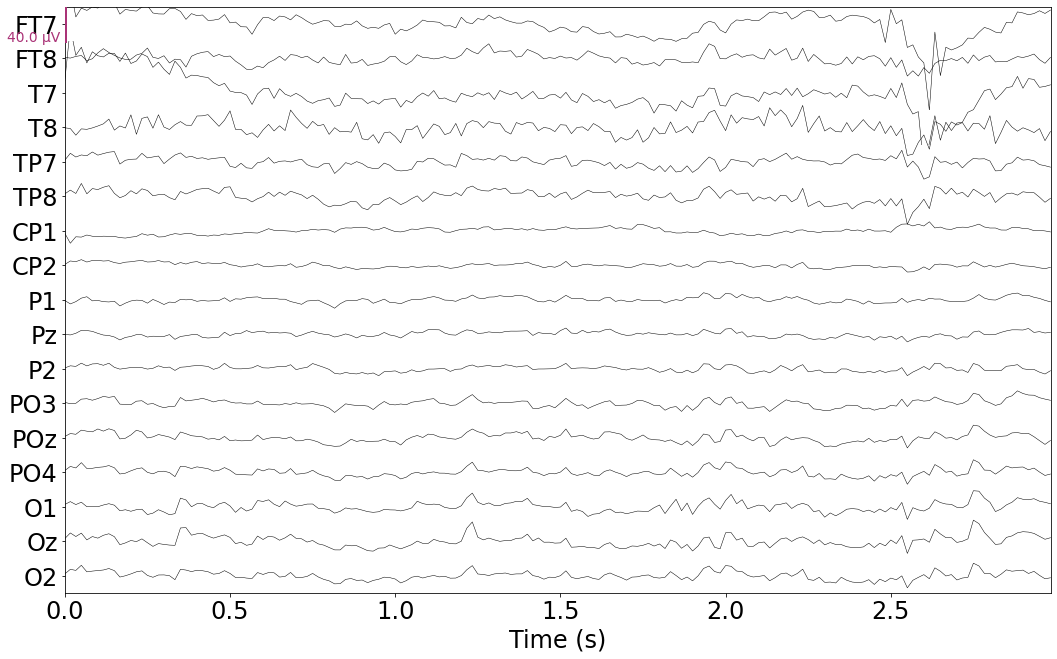

In [21]:
_ = raw_filtered_ica.plot(start=0, duration=3, show_scrollbars=False)

# Creacion de las Epochs artificiales de intervalos de tiempo iguales al intervalo entre valores PERCLOS

In [22]:
epochs = mne.make_fixed_length_epochs(raw_filtered, duration=int_perclos, preload=True)

Not setting metadata
Not setting metadata
885 matching events found
No baseline correction applied
0 projection items activated
Loading data for 885 events and 480 original time points ...
0 bad epochs dropped


In [27]:
plt.rcParams.update({'font.size': 20})
_ = epochs.plot(n_epochs=5, show_scrollbars=False)

Dropped 0 epochs: 
Channels marked as bad: none


In [ ]:
# TODO preguntar enrique
#reject_criteria = dict(eeg=150e-6) # 150 µV

#flat_criteria = dict(eeg=5e-6)     # 10 µV

#epochs.drop_bad(reject=reject_criteria, flat=flat_criteria, verbose=False)

In [ ]:
print(f'Porcentaje de canales rechazados: {(1-(len(epochs)/n_perclos))*100}%')

In [30]:
_ = epochs.plot(n_epochs=3)

Dropped 0 epochs: 
Channels marked as bad: none


In [28]:
y = np.array(perclos_data['perclos'])

plt.plot(y)
plt.show()

# Deep Learning

In [ ]:
### DNN ###
# Hyperparams
    # n_hidden_layers
        # entre 1 y 3
    # neurons_per_layer
        # hidden_layer = el mismo para todas
        # input_layer = n_features
        # output_layer = tipo_salida
    # Pero, cuantas en concreto para n_hidden_layers y hidden_layer_neurons?  
    # Respuesta: it’s often simpler and more efficient to pick a model with more layers and neurons than you actually need, 
    #            then use early stopping and other regularization techniques to prevent it from overfitting. 
    # batch_size:
        # opcion 1: entre 2 y 32
        # opcion 2: valores muy grandes de hasta 8192 si previamente se hace 'learning rate warmup' y vemos que va bien
    # activation_funciton:
        # hidden_layer = relu
        # output_layer = depende de la tarea (TODO, ver cual)
    # optimizer (de mejor a peor en fiabilidad/tiempo)
        # Nesterov Accelerated Gradient: keras.optimizers.SGD(lr=0.001,momentum=0.9,nesterov=True)
        # Adam: keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
        # RMSProp: keras.optimizers.RMSprop(lr=0.001,rho=0.9)
    # learning_rate
        # exponential decay (sencillo y va bien con Nesterov, p435)
        # performance scheduling
        # 1cycle 

## Lectura de los datos

In [ ]:
import numpy as np

n_epochs = len(epochs)
n_channels = len(epochs.info['ch_names'])
n_features = 2
total_features = n_channels*n_features
data = epochs.get_data()

# mean, std, variance, p05, q1, median, q3, p95
X = np.zeros(shape=(n_epochs, total_features))
y = np.array(perclos_data['perclos'])

mean_vals = np.zeros(n_epochs)
median_vals = np.zeros(n_epochs)

# OJO, modificar el valor de n_features, VA MEJOR SOLO CON LA MEDIA Y LA STD DE CADA CANAL
for i in range(n_epochs):
    for channel in range(n_channels):
        X[i, n_features*channel+0] = np.mean(data[i][channel])
        X[i, n_features*channel+1] = np.std(data[i][channel])
        
print(f'X shape: {X.shape}, y shape: {y.shape}')

In [ ]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
# Lectura de los datos
data = pd.read_csv('features.csv')

X = data.T.values[:-1].T
y = data.T.values[-1]

print(f'X shape: {X.shape}, y shape: {y.shape}')

### Preparacion de los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

sc = MinMaxScaler()
X_sc = sc.fit_transform(X)

# Tenemos que pasar de X de (885,n_features) a (885,n_features,1)
X_rs = np.reshape(X_sc, (885,X_sc.shape[1],1))
# Tenemos que pasar de y de (885,) a (885,1)
y_rs = np.reshape(y, (885,1))

In [ ]:
# 2 sets
from sklearn.model_selection import train_test_split

# Cambiar a X_rs e y_rs para RNN
X_train, X_test, y_train, y_test = train_test_split(X_rs, y_rs, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)

In [ ]:
# 3 sets
# X_train, y_train = X_rs[:620], y_rs[:620]
# X_valid, y_valid = X_rs[620:796], y_rs[620:796]
# X_test, y_test = X_rs[796:], y_rs[796:]

## Fully connected predictor

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

model = Sequential()
model.add(Dense(136, input_dim=1, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stop])

## RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import SGD, Adam

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch/s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

lr_scheduler = LearningRateScheduler(exponential_decay_fn)

early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1)

model = Sequential()
model.add(LSTM(100, input_shape=(None, 1), return_sequences=True))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100))
model.add(Dense(1))

optimizer = Adam(beta_1=0.9, beta_2=0.999, lr=0.01, decay=1e-4)
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.summary()

In [ ]:
model.fit(X_train, y_train, epochs=200, verbose=1, callbacks=[early_stop])

In [ ]:
y_pred = model.predict(X_rs)

plt.figure(figsize=(20, 8))
plt.plot(y_rs, color='black')
plt.plot(y_pred, color='red')
#plt.xlim(80,300)

## GRU

In [ ]:
model = Sequential()
model.add(GRU(15, input_shape=(34, 1), return_sequences=True))
model.add(GRU(15, return_sequences=True))
model.add(GRU(15))
model.add(Dense(1))

optimizer = Adam(beta_1=0.9, beta_2=0.999, lr=0.01, decay=1e-4)
model.compile(loss='mean_squared_error', optimizer=optimizer)

model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size=32, epochs=200, verbose=1, callbacks=[early_stop])

In [ ]:
y_pred = model.predict(X_rs)

plt.figure(figsize=(20, 8))
plt.plot(y_rs, color='black')
plt.plot(y_pred, color='red')

In [ ]:
plt.figure(figsize=(20, 8))
plt.axhline(y=0, color='black', linestyle='-')
plt.plot(y_rs-y_pred, color="red")
plt.title('Error en las predicciones respecto al valor real')
plt.xlabel('Epoch')
plt.ylabel('real-predicted')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.boxplot(y_rs-y_pred, showfliers=True)
plt.title('Diagrama de caja representando el error entre el valor real y las predicciones')
plt.show()